In [1]:
!pip install "tensorflow_hub>=0.6.0"
!pip install "tensorflow>=2.0.0"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import os
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization

In [0]:
PATH = '/content/drive/My Drive/MachineLearning/Emotion_detector'
DATA_PATH = '/dataset'

In [0]:
IMG_SIZE = 48
IMG_CLASSES = 7
TRAIN_DATA = 28708
TOTAL_IMG = 35887
BATCH_SIZE = 64
EPOCHS = 20

In [0]:
dataset = pd.read_csv(PATH + DATA_PATH + '/fer2013.csv')

In [7]:
dataset.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [8]:
dataset['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [0]:
def image_and_label(x, y):
  img = x.reshape(48, 48)
  plt.imshow(img, cmap="gray", interpolation="nearest")
  plt.axis('off')
  plt.show()
  print(y)

In [10]:
pixel_img = dataset['pixels'][9]
val = pixel_img.split(' ')
x_pixels = np.array(val, 'float32')
x_pixels /= 255
print(val)
print(x_pixels)

['255', '254', '255', '254', '254', '179', '122', '107', '95', '124', '149', '150', '169', '178', '179', '179', '181', '181', '184', '190', '191', '191', '193', '190', '190', '195', '194', '192', '193', '196', '193', '192', '188', '182', '173', '162', '152', '144', '129', '116', '113', '106', '184', '255', '252', '254', '255', '255', '255', '254', '254', '255', '238', '146', '122', '108', '126', '148', '167', '172', '179', '182', '184', '185', '184', '185', '186', '188', '189', '191', '188', '190', '192', '192', '192', '192', '194', '194', '194', '193', '187', '182', '179', '176', '168', '159', '146', '126', '120', '118', '148', '247', '253', '253', '255', '255', '255', '254', '253', '255', '212', '141', '125', '129', '153', '168', '172', '179', '182', '183', '187', '185', '185', '187', '188', '190', '192', '190', '192', '194', '193', '192', '190', '189', '191', '193', '191', '188', '186', '182', '178', '175', '171', '170', '164', '141', '114', '122', '125', '215', '255', '252', '255',

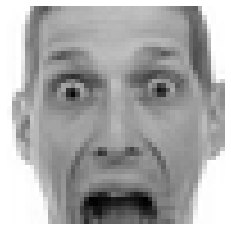

2


In [11]:
image_and_label(x_pixels, dataset['emotion'][9])

In [12]:
def hot_encode_emotions(y):
  y_encode = tf.one_hot(y, IMG_CLASSES)
  return y_encode

y_encode = hot_encode_emotions(dataset['emotion'])
print(y_encode)

tf.Tensor(
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]], shape=(35887, 7), dtype=float32)


In [0]:
def process_pixels(X, img_size):
  np_image_array = []
  for i in range(len(X)):
    pixel_img = X[i]
    val = pixel_img.split(' ')
    x_pixels = np.array(val, 'float32')
    x_pixels /= 255
    np_image_array.append(x_pixels.reshape(img_size, img_size))
  return np_image_array
np_X_arr = process_pixels(dataset['pixels'], IMG_SIZE)

In [0]:
X = np.array(np_X_arr)
X = X.reshape(TOTAL_IMG, 48, 48, 1)

In [0]:
train_X = X[0 : TRAIN_DATA]
train_y = y_encode[0 : TRAIN_DATA]
test_X = X[TRAIN_DATA + 1 : ]
test_y = y_encode[TRAIN_DATA + 1 : ]

In [0]:
def cnn_model():
  model = Sequential()

  #Layer - 1
  model.add(Conv2D(64, (3,3), padding = 'same', input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.50))

  # 2nd Convolution layer
  model.add(Conv2D(128,(5,5), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.50))

  # 3rd Convolution layer
  model.add(Conv2D(512,(3,3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.50))

  # # 4th Convolution layer
  # model.add(Conv2D(512,(3,3), padding='same'))
  # model.add(BatchNormalization())
  # model.add(Activation('relu'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Dropout(0.25))

  #Flattening
  model.add(Flatten())

  # Fully connected layer 1st layer
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))


  # Fully connected layer 2nd layer
  model.add(Dense(512))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

  model.add(Dense(IMG_CLASSES, activation='softmax'))

  model.compile(optimizer="adam", loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
  return model

In [0]:
model = cnn_model()

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_17 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_17 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_18 (Batc (None, 24, 24, 128)      

In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
model.fit(train_X, train_y, batch_size = BATCH_SIZE, epochs = 100, callbacks = [callback], validation_data = (test_X, test_y))

Epoch 1/100
449/449 [==============================] - 10s 22ms/step - loss: 0.7704 - accuracy: 0.7126 - val_loss: 1.0991 - val_accuracy: 0.6089
Epoch 2/100
449/449 [==============================] - 10s 22ms/step - loss: 0.7465 - accuracy: 0.7240 - val_loss: 1.2223 - val_accuracy: 0.5716
Epoch 3/100
449/449 [==============================] - 10s 22ms/step - loss: 0.7224 - accuracy: 0.7295 - val_loss: 1.1575 - val_accuracy: 0.5945
Epoch 4/100
449/449 [==============================] - 10s 22ms/step - loss: 0.7012 - accuracy: 0.7368 - val_loss: 1.4778 - val_accuracy: 0.5134
Epoch 5/100
449/449 [==============================] - 10s 22ms/step - loss: 0.6771 - accuracy: 0.7493 - val_loss: 1.1064 - val_accuracy: 0.6193
Epoch 6/100
449/449 [==============================] - 10s 22ms/step - loss: 0.6670 - accuracy: 0.7536 - val_loss: 1.1606 - val_accuracy: 0.6113
Epoch 7/100
449/449 [==============================] - 10s 22ms/step - loss: 0.6373 - accuracy: 0.7622 - val_loss: 1.1070 - val_ac